In [3]:
import torch        #대량의 숫자 계산(이미지)
import torchvision      #파이토치의 이미지 관련 dataset과 모델 등
import torchvision.transforms as transforms # 이미지 변환 기능

In [4]:
transform = transforms.Compose( # 이미지를 차례대로 처리함
    [transforms.ToTensor(),     # 이미지를 PyTorch텐서로 변환 (이미지를 픽셀값으로 변환)
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])   #이미지의 각 채널의 픽셀값 정규화 (평균 0.5, 표준편차 0.5)
                                                                # -> 픽셀 값 -1~1로 정규화
batch_size = 4  # 한번에 처리할 미니배치의 크기 "데이터셋을 4개의 이미지로 구성된 미니배치로 나누어서 학습 및 테스트"


#이미지 다운로드
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [01:00<00:00, 2804138.88it/s]


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


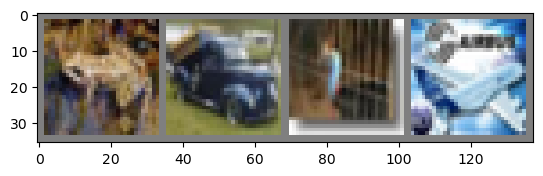

frog  truck bird  plane


In [5]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5  #비정규화 (앞에서 이미지 데이터를 -1~1로 정규화했기 때문)
    npimg = img.numpy()  # 이미지 텐서를 넘파이 배열로 변환 (Matplotlib에서 넘파이 배열을 사용하기 때문)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  
    # np.transpose() : 이미지 차원 순서 변경 (PyTorch에서 이미지 텐서의 차원 순서 : "채널, 높이, 너비"), Matplotlib의 차원순서:"높이, 너비, 채널"
    #plt.imshow() : 이미지 시각화
    plt.show() # 이미지 출력


dataiter = iter(trainloader) # trainset의 반복자
images, labels = next(dataiter) # next(dataiter) : 다음 미니 베치의 데이터를 가져와서 images와 label에 할당

imshow(torchvision.utils.make_grid(images)) 
#torchvision.utils.make_grid() : 이미지 배치를 그리드 형태로 변환
#imshow() : 그리드 이미지 시각화

print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))
#' '.join : 문자열을 공백으로 연결해서 출력